# Backtest under 60 lines.

with Time-series Momentum : https://alphaarchitect.com/2018/02/08/time-series-momentum-aka-trend-following-the-historical-evidence/

### credit : Anthony NG 
Algorithmic Trading Workshop Researcher and Conductor

In [1]:
%matplotlib inline

In [2]:
                                                                          #1
%matplotlib inline 

import numpy as np                                                        #2
import pandas as pd                                                       #3
import oandapyV20                                                         #4
from oandapyV20 import API                                                #5
import oandapyV20.endpoints.instruments as instruments                    #6
import configparser                                                       #7

import seaborn as sns                                                     #8
import matplotlib.pyplot as plt                                           #9
sns.set(style='darkgrid', context='talk', palette='deep')                 #10

config = configparser.ConfigParser()                                      #11
config.read('../config/config_v20.ini')                                   #12
accountID = config['oanda']['account_id']                                 #13
access_token = config['oanda']['api_key']                                 #14

client = oandapyV20.API(access_token=access_token,environment="practice") #15

Register Demo for API : https://www1.oanda.com/register/?div=11&cc=TH#/sign-up/demo

### Call historical data symbol USD/JPY 5,000 candles stick, Day period

In [3]:
params = {                                                                #16
          "count": 5000,                                                  #17
          "granularity": "D"}                                             #18
r = instruments.InstrumentsCandles(instrument="USD_JPY",                  #19
                                   params=params)                         #20

data = client.request(r)['candles']                                       #21

### Set columns name

In [4]:
df = pd.DataFrame([[oo['time'], oo['volume'], float(oo['mid']['o']),      #22
                    float(oo['mid']['h']), float(oo['mid']['l']),         #23
                    float(oo['mid']['c'])] for oo in data],               #24
                 columns=['time', 'vol', 'open', 'high', 'low', 'close']) #25

### Set datetime index

In [5]:
df['time'] = pd.to_datetime(df['time'])                                   #26
df.set_index('time', inplace=True)                                        #27

### Create asset_return column

In [6]:
df['asset_return'] = df['close'].pct_change()                             #28

### Set train and test data by first train on 2,999 and test on 3,000 data

In [7]:
dtrain = df[0:3000].copy()                                                #29
dtest = df[3000:].copy()                                                  #30

### let's check the data

In [8]:
df.head(5)                                                                #31

,vol,open,high,low,close,asset_return
time,,,,,,
2003-06-04 21:00:00+00:00,1,117.745,117.745,117.745,117.745,NaN
2003-06-05 21:00:00+00:00,1,118.660,118.660,118.660,118.660,0.007771
2003-06-07 21:00:00+00:00,1,118.750,118.750,118.750,118.750,0.000758
2003-06-08 21:00:00+00:00,1,118.235,118.235,118.235,118.235,-0.004337
2003-06-09 21:00:00+00:00,1,117.795,117.795,117.795,117.795,-0.003721


### Set time period to be a indicator Time-series momentum strategy

In [9]:
k = range(10, 500, 10)    #average window for momentum range                        #32
h = 1     # holding period of 1 day                                                 #33

In [10]:
for oo in k:                                                                        #34
    dtrain['signal'] = np.sign(dtrain['asset_return'].rolling(oo).sum())            #35
    dtrain['strategy_return'] =  dtrain['signal'].shift(1) * dtrain['asset_return'] #36
    data = dtrain['strategy_return'].dropna().sum()                                 #37
    print('{0:3} {1:>8.4f}'.format(oo, data))                                       #38

 10  -0.0064
 20  -0.0031
 30  -0.1831
 40  -0.2969
 50  -0.0792
 60   0.0904
 70   0.0073
 80  -0.2052
 90  -0.0284
100  -0.0371
110  -0.1156
120   0.0870
130  -0.2236
140   0.0240
150  -0.0321
160   0.1469
170   0.0035
180  -0.3265
190  -0.5138
200  -0.2928
210  -0.4739
220  -0.6773
230  -0.2855
240  -0.3474
250  -0.2604
260  -0.1250
270   0.0187
280  -0.0453
290   0.1542
300   0.2103
310   0.1359
320  -0.0128
330  -0.0324
340   0.0686
350   0.2028
360  -0.0363
370   0.0218
380   0.1432
390   0.2175
400   0.3437
410   0.2867
420   0.2642
430   0.2060
440   0.1315
450   0.1626
460   0.1047
470   0.1587
480   0.0450
490   0.0013


# Backtesting With the Test Set - Momentum

Note: we use the k=11,h=1 combination as it has the highest returns in the training set 

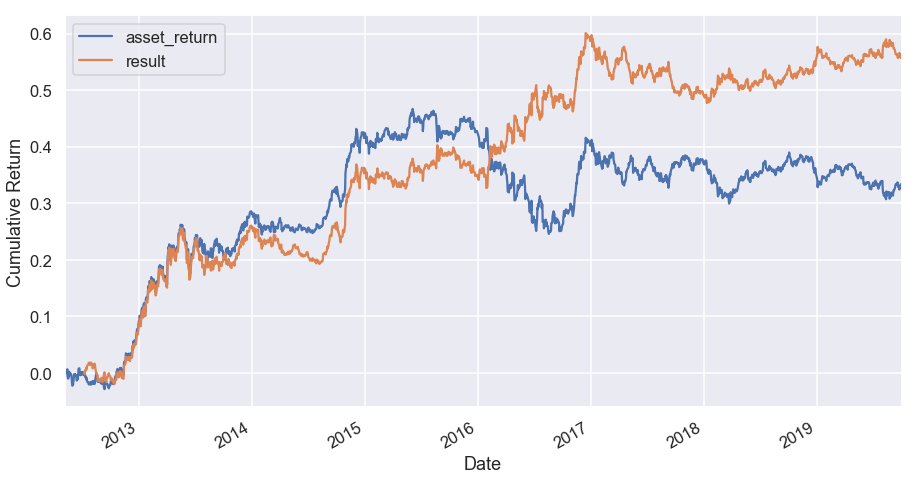

In [11]:
dtest['signal'] = np.sign(dtest['asset_return'].rolling(60).sum())                  #39
dtest['result'] = dtest['signal'].shift(1) * dtest['asset_return']                  #40
                                                                
dtest['asset_return'].dropna().cumsum().plot(figsize=(15,8))                        #41
dtest['result'].dropna().cumsum().plot(figsize=(15,8))                              #42

plt.xlabel('Date')                                                                  #43
plt.ylabel('Cumulative Return')                                                     #44
plt.grid(True)                                                                      #45
plt.legend()                                                                        #46